# Pandas - Data Analysis with Python


Pandas is a high-performance, easy-to-use data structures and data analysis tools.

<img src="figs/pandas.jpg" style="width: 500px;"/>

# Pandas
Pandas are fascinating creatures known for their distinctive black and white fur coat. Native to certain parts of China, these gentle giants primarily feed on bamboo, which makes up about 99% of their diet. Although known for their calm demeanor, they are adept tree climbers and swimmers. Pandas play a crucial role in the bamboo forests where they roam by facilitating seed dispersal, thus helping in the growth and proliferation of bamboo. Moreover, they are a symbol of peace and harmony in Chinese culture, and efforts are continuously being made to conserve their habitats and increase their population, which is threatened due to habitat loss and other environmental factors.

## What is it good for?

Working with (large) data sets and created automated data processes.

Pandas is extensively used to prepare data in data science (machine learning, data analytics, ...)

**Examples**: 
* **Import and export** data into standard formats (CSV, Excel, Latex, ..).
* Combine with Numpy for **advanced computations** or Matplotlib for **visualisations**.
* Calculate **statistics** and answer questions about the data, like
  * What's the average, median, max, or min of each column?
  * Does column A correlate with column B?
  * What does the distribution of data in column C look like?
* **Clean** up data (e.g. fill out missing information and fix inconsistent formatting) and **merge** multiple data sets into one common dataset.



## Some interesting data sources

### (Norsk) Statistisk sentralbyrå
https://www.ssb.no

Employment rates, immigration rates housing market, ...

<img src="figs/ssb.png" style="width: 400px;"/>

### Finn API 
https://www.finn.no/api

Note: Unfortunately currently only open for business

### Oslo Bysykkel API

https://oslobysykkel.no/en/open-data

Live usage data and statistics.

**!! This lecture will use this data.**

### Ruter API 
https://developer.entur.org

Travel planning and live departure information. For example live departure information 


<img src="figs/raspberry_pi_project.jpg" style="width: 300px;"/>

(Credits: Malte Pliszewski)

### YR data
http://om.yr.no/verdata/free-weather-data/

### Financial and economic data
https://www.quandl.com/

### And lots lots more:

* Almost every "smart" device, internet of things, ...
* https://github.com/public-apis/public-apis
* Web scraping

## More information

* Official Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/tutorials.html 
* Pandas cookbook: http://pandas.pydata.org/pandas-docs/stable/cookbook.html
* Wes McKinney, Python for Data Analysis 
![Python for Data Analysis](figs/python_for_data_analysis.gif "Python for Data Analysis")

## Installation

* If you have Anaconda: Already installed
* If you have Miniconda: 
      conda install pandas
* If you have your another Python distribution: 
      python3 -m pip install pandas

## Quick guide through Pandas


In [1]:
%matplotlib inline

First import pandas (and numpy) as usual.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The basic data structures of Pandas

<center>
<img src="https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png
" style="width: 500px;"/>

    Figure: Fundamental data types in Pandas.
    (Image source: https://www.learndatasci.com)
</center>

### Series 

Series in Pands are 1-dimensional, axis-labeled array capable of holding any data type.

The simplest way to create a Series is from a list:

In [3]:
s1 = pd.Series([1, 3, 5, np.nan, 6, 8])
s1

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

* Pandas relies on numpy to store the underlying data. Note the dtype property that we already know from numpy. 
* If no dtype is specified, it chooses a stuitable dtype for your data. 

## Specifying the axis label

By default, the data is labeld by integers. This can be changed with:

In [4]:
s2 = pd.Series([1, 3, 5, np.nan, 6, 8], index=["a", "b", "c", "d", "e", "f"])
s2

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

# Time-series data

A common use-case is to have data labeled with time stamps (for instance price, currency and weather data).



In [5]:
dates = pd.date_range(start='20181023', end='20191023', periods=6)
dates

DatetimeIndex(['2018-10-23', '2019-01-04', '2019-03-18', '2019-05-30',
               '2019-08-11', '2019-10-23'],
              dtype='datetime64[ns]', freq=None)

In [6]:
s3 = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates)
s3

2018-10-23    1.0
2019-01-04    3.0
2019-03-18    5.0
2019-05-30    NaN
2019-08-11    6.0
2019-10-23    8.0
dtype: float64

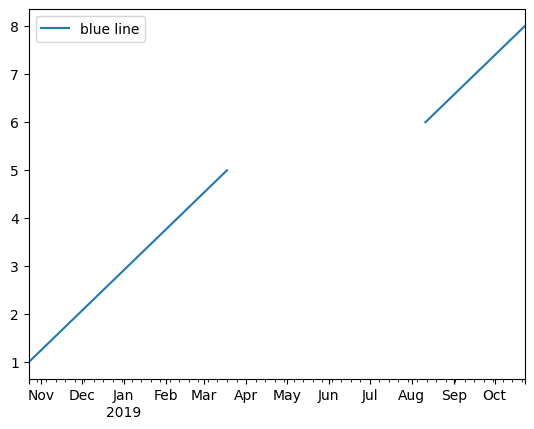

In [12]:
s3.plot(label="blue line").legend()

# DataFrame

DataFrame's are 2-dimensional labeled data structure with columns of potentially different types.

The most basic method to create a DataFrame is from a dictionary:

In [13]:
data = {
    'apples': [3, 0, 0, 1],
    'pears':  [6, 1, 3, 5]
}

purchases = pd.DataFrame(data)
purchases

,apples,pears
0,3,6
1,0,1
2,0,3
3,1,5


**How did this work:** Each (key, value) pair in the dictionary is interpreted as a column in the data table. The key is used as column label.

As with Series, we can provide an index to label the y-axis:

In [14]:
data = {
    'apples': [3, 0, 0, 1],
    'pears':  [6, 1, 3, 2]
}
customers = ["Marie", "Jør®®gen", "Hilde", "Hans"]

purchases = pd.DataFrame(data, index=customers)
purchases

,apples,pears
Marie,3,6
Jør®®gen,0,1
Hilde,0,3
Hans,1,2


## Extracting columns from a DataTable

When **loc**ating (i.e. extracting) a column or row of a DataFrame, one obtains a `Series`

In [15]:
purchases.loc["Hans"]

apples    1
pears     2
Name: Hans, dtype: int64

In [16]:
purchases["apples"]

Marie       3
Jør®®gen    0
Hilde       0
Hans        1
Name: apples, dtype: int64

In [17]:
type(purchases.loc["Hans"])

pandas.core.series.Series

## Combining two Series to a DataFrame 

In [22]:
s1 = pd.Series([1, 2], index=['A', 'B'])
s2 = pd.Series([3, 4], index=['A', 'B'])

print(s1)
print(s2)

A = pd.concat([s1, s2, s1], axis=1, sort=False)
s1["A"] = 5
print(A)
print(s1)

A    1
B    2
dtype: int64
A    3
B    4
dtype: int64
   0  1  2
A  1  3  1
B  2  4  2
A    5
B    2
dtype: int64


## Loading data from file

For pratical applications, we will read the data from a file rather from a dictionary. 

Pandas offers various drivers to load data in different formats:

In [23]:
pd.read_*?

pd.read_clipboard
pd.read_csv
pd.read_excel
pd.read_feather
pd.read_fwf
pd.read_gbq
pd.read_hdf
pd.read_html
pd.read_json
pd.read_orc
pd.read_parquet
pd.read_pickle
pd.read_sas
pd.read_spss
pd.read_sql
pd.read_sql_query
pd.read_sql_table
pd.read_stata
pd.read_table
pd.read_xml

We will see this in a real application in a moment.

# Data analysis on the Oslo Byskkel data 



<img src="https://cdn.sanity.io/images/23ukf9xm/production/4acf4a351c2174972b61465210f56878c41bad65-5698x3799.jpg?w=1200&h=600&fit=max" style="width: 500px;"/>



**Goal**: Perfrom data analysis of the bike usage, such as:
* Identify peak and low points of bike station usage (over a year, week or day)?
* Which are the most and least used bike stations?
* Which are the most and least used bike routes?
* Visualize the bike usage in Oslo.

## Step 1: Data aquisition and inspection

The monthly usage data can be downloaded here: https://oslobysykkel.no/en/open-data

I downloaded the data from August to September 2016:

In [24]:
!dir data\bysykkel

 Volume in drive C is Windows
 Volume Serial Number is 3CBD-9501

 Directory of c:\Users\58263\GRA4157\lectures\04-pandas\data\bysykkel

08/10/2024  08:55    <DIR>          .
09/08/2024  08:24    <DIR>          ..
13/09/2024  09:48        36,704,380 08.csv
09/08/2024  08:24               103 get_station_data.sh
09/08/2024  08:24            64,322 stations.json
09/08/2024  08:24        14,808,252 trips-2016.10.1-2016.10.31.csv
09/08/2024  08:24        23,038,260 trips-2016.9.1-2016.9.30.csv
09/08/2024  08:24        38,884,105 trips-2021.10.1-2021.10.31.csv
09/08/2024  08:24        38,160,996 trips-2021.9.1-2021.9.30.csv
               7 File(s)    151,660,418 bytes
               2 Dir(s)  753,058,807,808 bytes free


Let's inspect the content of one of these files:

## Loading the data into a DataFrame

Since this is a comma seperated file, we can use Panda's `read_csv` function:

In [25]:
import pandas as pd
trips = pd.read_csv('data/bysykkel/trips-2016.10.1-2016.10.31.csv', 
                    sep=',')

The result is stored in  a `DataFrame` object. The first row of the csv was used as column labels.

In [26]:
trips.head()

,Start station,Start time,End station,End time
0,283,2016-10-01 06:00:08 +0200,238.0,2016-10-01 06:09:47 +0200
1,169,2016-10-01 06:00:41 +0200,175.0,2016-10-01 06:11:07 +0200
2,211,2016-10-01 06:01:02 +0200,162.0,2016-10-01 06:15:52 +0200
3,200,2016-10-01 06:01:20 +0200,163.0,2016-10-01 06:15:04 +0200
4,157,2016-10-01 06:02:16 +0200,163.0,2016-10-01 06:04:29 +0200


We can use the `head` and `tail` functions to only show the (by default 5) top rows in the data table.

In [29]:
trips.head(1)

,Start station,Start time,End station,End time
0,283,2016-10-01 06:00:08 +0200,238.0,2016-10-01 06:09:47 +0200


## Fixing columns types

Pandas tries to **automatically detect the type** of a column:

In [30]:
trips.dtypes

Start station      int64
Start time        object
End station      float64
End time          object
dtype: object

We can see that this **automatic detection failed** for:

* `Start time`:  should be a date
* `End time`:  should be a date
* `End station`:  should be a integer

## Fixing  start and end times

In order to be able to sort or filter by date, we need to tell Pandas that this column should be parsed as dates. We can do this directly when loading in the data: 

In [31]:
trips = trips_oct = pd.read_csv(
    "data/bysykkel/trips-2016.10.1-2016.10.31.csv",
    sep=",",
    parse_dates=["Start time", "End time"],
    date_parser=lambda col: pd.to_datetime(col, utc=True),
)

C:\Users\58263\AppData\Local\Temp\ipykernel_3028\2344925242.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  trips = trips_oct = pd.read_csv(


**Note!**  The lambda function is necessary to read dates with mixed time-zones!

In [32]:
trips.dtypes

Start station                  int64
Start time       datetime64[ns, UTC]
End station                  float64
End time         datetime64[ns, UTC]
dtype: object

In [33]:
trips.head()

,Start station,Start time,End station,End time
0,283,2016-10-01 04:00:08+00:00,238.0,2016-10-01 04:09:47+00:00
1,169,2016-10-01 04:00:41+00:00,175.0,2016-10-01 04:11:07+00:00
2,211,2016-10-01 04:01:02+00:00,162.0,2016-10-01 04:15:52+00:00
3,200,2016-10-01 04:01:20+00:00,163.0,2016-10-01 04:15:04+00:00
4,157,2016-10-01 04:02:16+00:00,163.0,2016-10-01 04:04:29+00:00


### Fixing end station

We expected `End station` to be of type `np.int64`. We can enforce this with:

In [34]:
import numpy as np
trips = pd.read_csv(
    "data/bysykkel/trips-2016.10.1-2016.10.31.csv",
    sep=",",
    parse_dates=["Start time", "End time"],
    date_parser=lambda col: pd.to_datetime(col, utc=True),
    dtype={"End station": np.int64},
)

C:\Users\58263\AppData\Local\Temp\ipykernel_3028\1812018494.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  trips = pd.read_csv(


ValueError: Integer column has NA values in column 2

**Conclusion**: 
`End station` contains `Not a Number` values or`NaN` values, which can be represented in the `float` datatype, but not in the `int` datatype

In [35]:
trips.sort_values("End station").tail(100)

,Start station,Start time,End station,End time
174509,182,2016-10-21 12:53:05+00:00,309.0,2016-10-21 13:50:30+00:00
211908,215,2016-10-27 09:18:41+00:00,309.0,2016-10-27 09:32:19+00:00
111557,162,2016-10-13 10:31:14+00:00,309.0,2016-10-13 10:38:54+00:00
105880,162,2016-10-12 16:08:20+00:00,309.0,2016-10-12 16:20:24+00:00
234911,267,2016-10-30 14:44:27+00:00,309.0,2016-10-30 14:59:58+00:00
...,...,...,...,...
107496,233,2016-10-12 19:05:32+00:00,NaN,2016-10-17 05:56:12+00:00
117359,267,2016-10-13 20:55:38+00:00,NaN,2016-10-14 09:43:21+00:00
153782,232,2016-10-19 06:08:40+00:00,NaN,2016-10-20 05:42:02+00:00
200309,158,2016-10-25 17:22:32+00:00,NaN,2016-10-25 18:02:16+00:00


But we *can* do this if we discard the rows with missing data. Pandas has various utilities for dealing with missing data

In [36]:
s = pd.Series([1,2,np.nan, 4,5, np.nan])
s.dropna()

0    1.0
1    2.0
3    4.0
4    5.0
dtype: float64

In [37]:
trips = trips.dropna(subset=["End station"]).astype({"End station": int})
trips.tail(5)

,Start station,Start time,End station,End time
242753,284,2016-10-31 22:53:30+00:00,164,2016-10-31 23:04:13+00:00
242754,218,2016-10-31 22:53:48+00:00,292,2016-10-31 23:09:17+00:00
242755,204,2016-10-31 22:54:28+00:00,277,2016-10-31 23:01:59+00:00
242756,204,2016-10-31 22:56:57+00:00,201,2016-10-31 23:02:16+00:00
242757,268,2016-10-31 22:59:10+00:00,299,2016-10-31 23:04:55+00:00


In [38]:
trips.astype({'End station': 'int64'}).dtypes

Start station                  int64
Start time       datetime64[ns, UTC]
End station                    int64
End time         datetime64[ns, UTC]
dtype: object

# Selecting data from dataframes

## Selecting columns


There are three main ways to select columns from a DataTable:

* indexing notation [].
* The .loc accessor
* The .iloc accessor

## Selecting columns with the index notation

Use the index notation if you know the name of the column(s) that you want to extract.

If you use a single column, the result is a Series:

In [39]:
trips["Start time"].head()

0   2016-10-01 04:00:08+00:00
1   2016-10-01 04:00:41+00:00
2   2016-10-01 04:01:02+00:00
3   2016-10-01 04:01:20+00:00
4   2016-10-01 04:02:16+00:00
Name: Start time, dtype: datetime64[ns, UTC]

## Selecting multiple columns

Multiple columns are selected by indexing with a list of column titles. The result is a DataFrame:

In [40]:
trips[["Start time", "End time"]].head()

,Start time,End time
0,2016-10-01 04:00:08+00:00,2016-10-01 04:09:47+00:00
1,2016-10-01 04:00:41+00:00,2016-10-01 04:11:07+00:00
2,2016-10-01 04:01:02+00:00,2016-10-01 04:15:52+00:00
3,2016-10-01 04:01:20+00:00,2016-10-01 04:15:04+00:00
4,2016-10-01 04:02:16+00:00,2016-10-01 04:04:29+00:00


### Selecting rows and columns 

`loc`  a more explicit alternative for selecting rows and/or columns

**Syntax**: `DataFrame.loc[ROWS, COLUMNS]`

In [41]:
trips.loc[[1,5], ["Start time", "End time"]]

,Start time,End time
1,2016-10-01 04:00:41+00:00,2016-10-01 04:11:07+00:00
5,2016-10-01 04:04:22+00:00,2016-10-01 04:24:40+00:00


Use the : notation to select ranges of columns/rows.

### Selecting rows and columns based on indices

`iloc` is the same is `loc` but expectes the index positions instead of column names (i.e. always uses intergers)

**Syntax**: `DataFrame.iloc[ROWS, COLUMNS]`

In [42]:
trips.iloc[:5, 0:2]

,Start station,Start time
0,283,2016-10-01 04:00:08+00:00
1,169,2016-10-01 04:00:41+00:00
2,211,2016-10-01 04:01:02+00:00
3,200,2016-10-01 04:01:20+00:00
4,157,2016-10-01 04:02:16+00:00


## Selecting based on values in columns

Comparisons on a series produce a new series of booleans.
This can be used to construct a "mask" of values that can be passed
to loc or index-access:

In [43]:
trips["Start station"] == 283

0          True
1         False
2         False
3         False
4         False
          ...  
242753    False
242754    False
242755    False
242756    False
242757    False
Name: Start station, Length: 242747, dtype: bool

We can use this information to determine the number of trips that started at station 283:

In [44]:
(trips["Start station"] == 283).sum()

1321

And inspect details about those trips:

In [45]:
trips[trips["Start station"] == 283]

,Start station,Start time,End station,End time
0,283,2016-10-01 04:00:08+00:00,238,2016-10-01 04:09:47+00:00
359,283,2016-10-01 06:55:45+00:00,219,2016-10-01 07:01:49+00:00
486,283,2016-10-01 07:24:19+00:00,284,2016-10-01 07:28:29+00:00
572,283,2016-10-01 07:38:59+00:00,170,2016-10-01 07:41:09+00:00
650,283,2016-10-01 07:49:42+00:00,189,2016-10-01 07:53:22+00:00
...,...,...,...,...
242126,283,2016-10-31 18:43:21+00:00,267,2016-10-31 18:46:47+00:00
242140,283,2016-10-31 18:48:02+00:00,176,2016-10-31 18:52:59+00:00
242313,283,2016-10-31 19:46:46+00:00,222,2016-10-31 19:59:02+00:00
242357,283,2016-10-31 20:01:14+00:00,184,2016-10-31 20:05:26+00:00


We can even do complex arithmetic on columns

In [46]:
durations = trips["End time"] - trips["Start time"]
durations

0        0 days 00:09:39
1        0 days 00:10:26
2        0 days 00:14:50
3        0 days 00:13:44
4        0 days 00:02:13
               ...      
242753   0 days 00:10:43
242754   0 days 00:15:29
242755   0 days 00:07:31
242756   0 days 00:05:19
242757   0 days 00:05:45
Length: 242747, dtype: timedelta64[ns]

In [47]:
durations.quantile(0.9)

Timedelta('0 days 00:23:20')

Anything that results in a boolean Series with the same index as a dataframe or series
can be used to select a subset of data.

This example says: give us the top 10% (above 90th percential) of trips by duration

In [48]:
trips[durations >= durations.quantile(0.9)]

,Start station,Start time,End station,End time
33,285,2016-10-01 04:33:13+00:00,222,2016-10-01 05:57:49+00:00
41,277,2016-10-01 04:37:56+00:00,277,2016-10-01 05:30:49+00:00
52,183,2016-10-01 04:44:03+00:00,272,2016-10-01 05:08:39+00:00
64,208,2016-10-01 04:52:09+00:00,281,2016-10-01 14:08:30+00:00
109,251,2016-10-01 05:16:10+00:00,185,2016-10-01 09:54:50+00:00
...,...,...,...,...
242610,158,2016-10-31 21:42:49+00:00,158,2016-10-31 22:38:37+00:00
242632,257,2016-10-31 21:51:15+00:00,169,2016-10-31 23:29:49+00:00
242722,191,2016-10-31 22:31:43+00:00,253,2016-11-01 01:56:19+00:00
242744,189,2016-10-31 22:46:57+00:00,275,2016-11-01 00:45:11+00:00


Or specify a value. Pandas has lots of *very* useful convenience functions
for comparing dates. You can often specify a string which pandas will interpret

In [49]:
trips[durations >= "1 day"]

,Start station,Start time,End station,End time
178,243,2016-10-01 05:43:24+00:00,175,2016-10-18 07:53:19+00:00
963,226,2016-10-01 08:39:35+00:00,172,2016-10-06 17:09:17+00:00
1370,226,2016-10-01 09:35:22+00:00,173,2016-10-17 05:48:48+00:00
3629,199,2016-10-01 12:43:13+00:00,240,2016-10-03 21:08:30+00:00
4677,301,2016-10-01 13:59:43+00:00,176,2016-10-04 05:36:49+00:00
...,...,...,...,...
229348,204,2016-10-29 13:25:04+00:00,182,2016-10-31 07:37:25+00:00
229826,260,2016-10-29 14:13:46+00:00,219,2016-10-31 05:41:37+00:00
230667,267,2016-10-29 15:52:05+00:00,277,2016-10-30 18:40:50+00:00
232648,229,2016-10-30 06:38:10+00:00,287,2016-10-31 08:05:02+00:00


## Special handling of strings and datetime

Series with datetime data or strings have special accessor methods for working with that kind of data
by accessing a `.dt` or `.str` attribute, giving access to 

In [50]:
trips["Start time"].dt.weekday

0         5
1         5
2         5
3         5
4         5
         ..
242753    0
242754    0
242755    0
242756    0
242757    0
Name: Start time, Length: 242747, dtype: int32

Boolean series can be combined using Python's bitwise or (`|`) and bitwise and (`&`) operators.
So we can find late-night trips, i.e. those that start between 22:00 and 04:00

In [51]:
trips[(trips["Start time"].dt.hour >= 22) | (trips["Start time"].dt.hour <= 3)]

,Start station,Start time,End station,End time
26424,287,2016-10-04 03:59:55+00:00,195,2016-10-04 04:03:18+00:00
26425,229,2016-10-04 03:59:56+00:00,247,2016-10-04 04:05:28+00:00
79522,206,2016-10-10 03:59:56+00:00,196,2016-10-10 04:04:46+00:00
108408,283,2016-10-13 03:59:52+00:00,280,2016-10-13 04:05:36+00:00
108409,251,2016-10-13 03:59:54+00:00,265,2016-10-13 04:05:13+00:00
...,...,...,...,...
242753,284,2016-10-31 22:53:30+00:00,164,2016-10-31 23:04:13+00:00
242754,218,2016-10-31 22:53:48+00:00,292,2016-10-31 23:09:17+00:00
242755,204,2016-10-31 22:54:28+00:00,277,2016-10-31 23:01:59+00:00
242756,204,2016-10-31 22:56:57+00:00,201,2016-10-31 23:02:16+00:00


## GroupBy

grouping is like creating a dictionary of dataframes for subsets of your data.
You can group by any kind of value.
The result is like a dictionary of data frames,
where each one contains a subset of data matching some criterion.

You can pass groupby one or more column names to group by unique values on that column

In [52]:
trips.groupby("Start station").count()

,Start time,End station,End time
Start station,,,
157,2108,2108,2108
158,1465,1465,1465
159,1597,1597,1597
160,1121,1121,1121
161,2444,2444,2444
...,...,...,...
305,621,621,621
306,1414,1414,1414
307,256,256,256


Metrics such as `count`, `unique`, `value_counts` etc. result in actual evaluation

In [53]:
trips.groupby("Start station")["End station"].count()

Start station
157    2108
158    1465
159    1597
160    1121
161    2444
       ... 
305     621
306    1414
307     256
308     257
309     464
Name: End station, Length: 131, dtype: int64

`.value_counts()` creates a Series, so we have a two-level index:

In [54]:
trips.groupby("Start station")["End station"].value_counts()

Start station  End station
157            211            165
               157            125
               163            112
               186             96
               277             94
                             ... 
309            275              1
               290              1
               292              1
               294              1
               301              1
Name: count, Length: 13969, dtype: int64

In [55]:
trips.groupby("Start station")["End station"].value_counts()[157]

End station
211    165
157    125
163    112
186     96
277     94
      ... 
249      1
265      1
268      1
275      1
307      1
Name: count, Length: 101, dtype: int64

We can use groupby to count the number of trips that start on each weekday:

In [56]:
trips.groupby(trips["Start time"].dt.weekday).count()

,Start station,Start time,End station,End time
Start time,,,,
0,40525,40525,40525,40525
1,36905,36905,36905,36905
2,36465,36465,36465,36465
3,36989,36989,36989,36989
4,35199,35199,35199,35199
5,32122,32122,32122,32122
6,24542,24542,24542,24542


In [57]:
trips.groupby(trips["Start time"].dt.weekday)["Start station"].count()

Start time
0    40525
1    36905
2    36465
3    36989
4    35199
5    32122
6    24542
Name: Start station, dtype: int64

In [58]:
by_day = trips.groupby(trips["Start time"].dt.weekday)
grouped = trips.groupby([trips["Start time"].dt.weekday, trips["Start time"].dt.day == trips["End time"].dt.day])
print((grouped.count() / by_day.count())["Start station"].to_string(float_format="{:,.2%}".format))

Start time       
0           False    0.32%
            True    99.68%
1           False    0.34%
            True    99.66%
2           False    0.28%
            True    99.72%
3           False    0.34%
            True    99.66%
4           False    0.32%
            True    99.68%
5           False    0.47%
            True    99.53%
6           False    0.53%
            True    99.47%


In [59]:
by_day = trips.groupby(trips["Start time"].dt.weekday)
by_day.count()

,Start station,Start time,End station,End time
Start time,,,,
0,40525,40525,40525,40525
1,36905,36905,36905,36905
2,36465,36465,36465,36465
3,36989,36989,36989,36989
4,35199,35199,35199,35199
5,32122,32122,32122,32122
6,24542,24542,24542,24542


In [60]:
grouped = trips.groupby([trips["Start time"].dt.weekday, trips["Start time"].dt.day == trips["End time"].dt.day])
grouped.count()

Start station  Start time  End station  End time
Start time                                                        
0          False            128         128          128       128
           True           40397       40397        40397     40397
1          False            125         125          125       125
           True           36780       36780        36780     36780
2          False            103         103          103       103
           True           36362       36362        36362     36362
3          False            124         124          124       124
           True           36865       36865        36865     36865
4          False            111         111          111       111
           True           35088       35088        35088     35088
5          False            151         151          151       151
           True           31971       31971        31971     31971
6          False            131         131          131       131
           True           24411       24411        24411     24411

In [61]:
s = (grouped.count() / by_day.count())["Start station"]
s

Start time       
0           False    0.003159
            True     0.996841
1           False    0.003387
            True     0.996613
2           False    0.002825
            True     0.997175
3           False    0.003352
            True     0.996648
4           False    0.003153
            True     0.996847
5           False    0.004701
            True     0.995299
6           False    0.005338
            True     0.994662
Name: Start station, dtype: float64

In [62]:
print(s.to_string(float_format="{:,.2%}".format))

Start time       
0           False    0.32%
            True    99.68%
1           False    0.34%
            True    99.66%
2           False    0.28%
            True    99.72%
3           False    0.34%
            True    99.66%
4           False    0.32%
            True    99.68%
5           False    0.47%
            True    99.53%
6           False    0.53%
            True    99.47%


## Visualisation

We can use the `plot` class method to plot our data table:

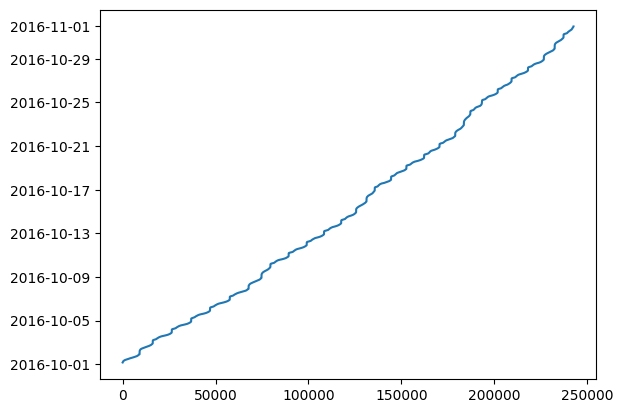

In [63]:
trips['Start time'].plot();


By default, the DataFrame index is used to label the x-axis.

## Plotting multiple columns 

Passing multiple columns results in multiple plot lines

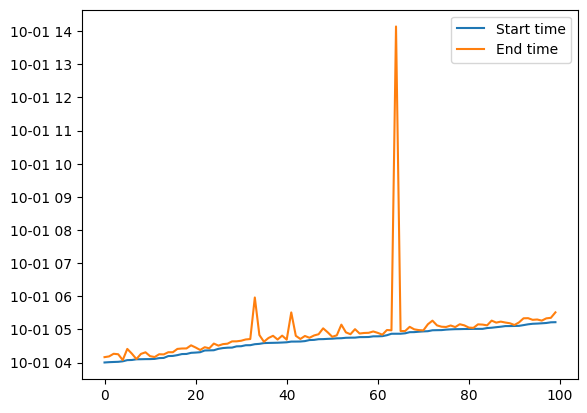

In [64]:
trips[['Start time', 'End time']].head(100).plot();

In order to get a more meaningful x-axis, we can select a column to be used as the x-axis:

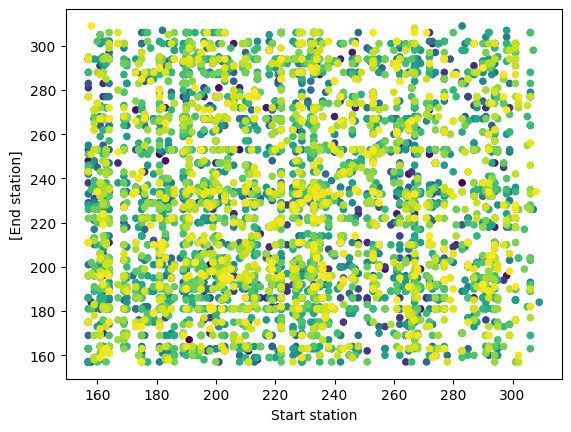

In [65]:
trips.head(5000).plot.scatter(
    x="Start station", y=["End station"], c="Start time", cmap="viridis"
);

## Bar plots

The documentation of plot reveils many more plotting options:

In [66]:
trips.plot?

Signature:      trips.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x000001CD53D6E690>
File:           c:\users\58263\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
   

For example, let's create a bar plot:

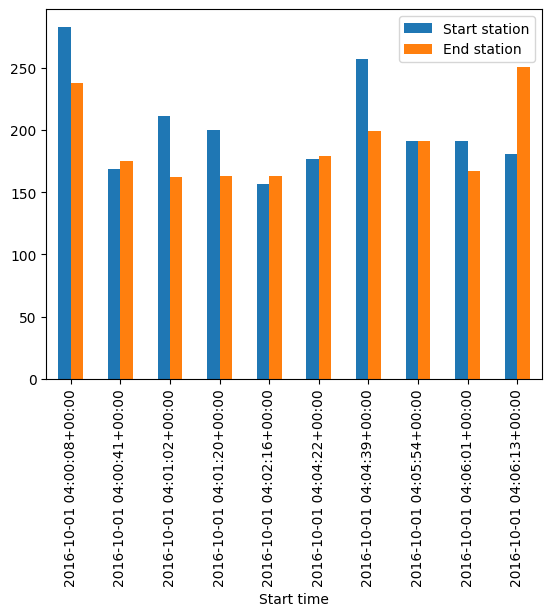

In [67]:
trips.head(10).plot(x='Start time', y=['Start station', 'End station'], kind='bar');

## Histograms

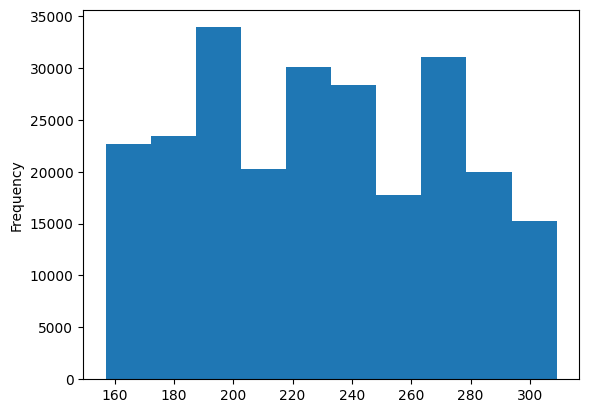

In [68]:
trips['Start station'].plot(kind='hist');

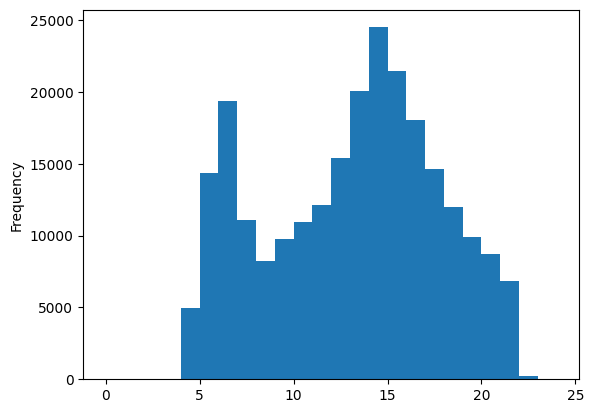

In [69]:
trips['Start time'].dt.hour.plot(kind='hist', bins=range(25));

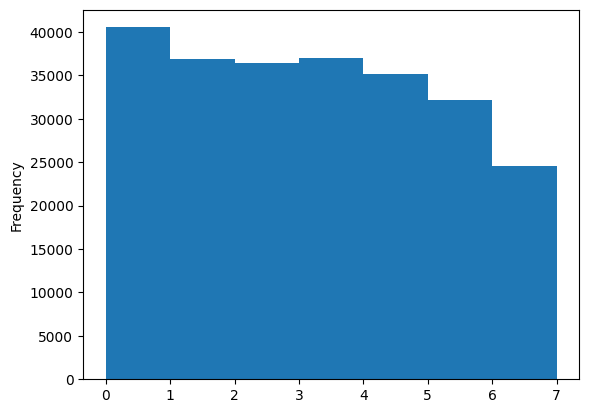

In [70]:
trips['Start time'].dt.weekday.plot.hist(bins=range(8));

'unstack' takes a two-level index and promotes one level to column names

In [71]:
grouped.count()["Start station"]

Start time       
0           False      128
            True     40397
1           False      125
            True     36780
2           False      103
            True     36362
3           False      124
            True     36865
4           False      111
            True     35088
5           False      151
            True     31971
6           False      131
            True     24411
Name: Start station, dtype: int64

In [72]:
grouped.count()["Start station"].unstack(1)

,False,True
Start time,,
0,128,40397
1,125,36780
2,103,36362
3,124,36865
4,111,35088
5,151,31971
6,131,24411


In [74]:
import calendar
import matplotlib.pyplot as plt

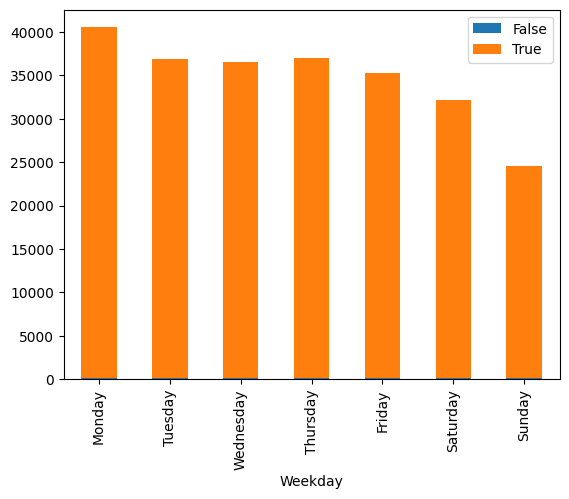

In [75]:
grouped.count()["Start station"].unstack(1).plot(kind="bar", stacked=True)
plt.xlabel("Weekday");
plt.xticks(range(7), calendar.day_name);

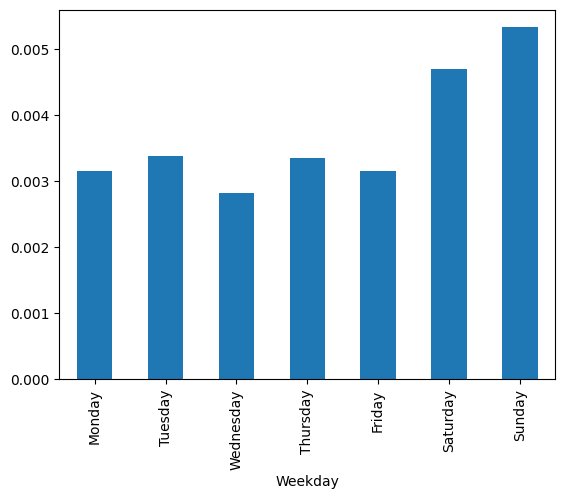

In [76]:
(grouped.count() / by_day.count())["Start station"].unstack(1)[False].plot.bar()
plt.xlabel("Weekday");
plt.xticks(range(7), calendar.day_name);

## Saving data 

DataFrames can be saved to various formats. 

For exporting to a spreadsheet compatible format (e.g. Excel), you can export as CSV file: 

In [77]:
data = trips[['Start station', 'End station']].head(10)

with open("start_stop_stations.csv", "w") as file:
    csv =  data.to_csv()
    print(csv)
    file.write(csv)

,Start station,End station
0,283,238
1,169,175
2,211,162
3,200,163
4,157,163
5,177,179
6,257,199
7,191,191
8,191,167
9,181,251



Notice that it includes the index

In [78]:
data = trips[['Start station', 'End station']].head(10)

with open("start_stop_stations.csv", "w") as file:
    csv =  data.to_csv(index_label="index")
    print(csv)
    file.write(csv)

index,Start station,End station
0,283,238
1,169,175
2,211,162
3,200,163
4,157,163
5,177,179
6,257,199
7,191,191
8,191,167
9,181,251



## Usefull trick for your master thesis

**Goal**: If you do data analyis as part of your research, it is usefull to generate any figures/tables directly from your analytics scripts. 

**Solution**: Pandas can automatically generate Latex tables: 

In [80]:
with open('table.tex', 'w') as file:
    latex = data.to_latex()
    print(latex)
    file.write(latex)

data

\begin{tabular}{lrr}
\toprule
 & Start station & End station \\
\midrule
0 & 283 & 238 \\
1 & 169 & 175 \\
2 & 211 & 162 \\
3 & 200 & 163 \\
4 & 157 & 163 \\
5 & 177 & 179 \\
6 & 257 & 199 \\
7 & 191 & 191 \\
8 & 191 & 167 \\
9 & 181 & 251 \\
\bottomrule
\end{tabular}



,Start station,End station
0,283,238
1,169,175
2,211,162
3,200,163
4,157,163
5,177,179
6,257,199
7,191,191
8,191,167
9,181,251


## Simple data analytics: What are the most used bike stations?

**Approach**: For each bike station usage, the station's `id` occurs in a new row in the `Start station` column. 
In order to find how often a bike station is used, we count how often the station id occurs in the `Start station` column. By sorting these counds from high to low, we get the most used bike stations. 

The function `value_counts` does exactly what we need:

In [81]:
trips['Start station'].value_counts()[10:]   

Start station
229    3771
210    3586
262    3568
164    3428
287    3289
       ... 
249     270
308     257
188     256
307     256
256     153
Name: count, Length: 121, dtype: int64

Let's plot the result in the bar chart:

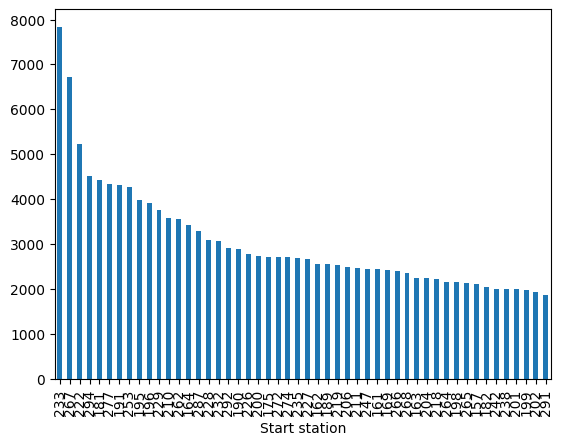

In [82]:
trips['Start station'].value_counts()[:50].plot(kind='bar');
plt.grid(False);

## Concatenating DataFrames 1/2

The data so far only contained the statistics for October 2016:

In [83]:
trips_oct["Start time"].min(), trips_oct["Start time"].max()

(Timestamp('2016-10-01 04:00:08+0000', tz='UTC'),
 Timestamp('2016-10-31 22:59:10+0000', tz='UTC'))

Let us load the data for September 2016:

In [84]:
trips_sep = pd.read_csv(
    "data/bysykkel/trips-2016.9.1-2016.9.30.csv",
    sep=",",
    parse_dates=["Start time", "End time"],
    date_parser=lambda col: pd.to_datetime(col, utc=True),
)
# perform transform to ensure we have integer stations
trips_sep = trips_sep.dropna().astype({"End station": int})

C:\Users\58263\AppData\Local\Temp\ipykernel_3028\913141250.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  trips_sep = pd.read_csv(


## Concatenating DataFrames 2/2

To concatenate the two, we use the `concat` function:

In [85]:
trips = pd.concat([trips_sep, trips_oct]).reset_index()
trips

,index,Start station,Start time,End station,End time
0,0,291,2016-09-01 04:00:02+00:00,301.0,2016-09-01 04:06:06+00:00
1,1,262,2016-09-01 04:00:07+00:00,292.0,2016-09-01 04:15:43+00:00
2,2,277,2016-09-01 04:00:07+00:00,163.0,2016-09-01 04:03:07+00:00
3,3,174,2016-09-01 04:00:07+00:00,157.0,2016-09-01 04:11:33+00:00
4,4,257,2016-09-01 04:00:13+00:00,257.0,2016-09-01 05:36:16+00:00
...,...,...,...,...,...
620402,242753,284,2016-10-31 22:53:30+00:00,164.0,2016-10-31 23:04:13+00:00
620403,242754,218,2016-10-31 22:53:48+00:00,292.0,2016-10-31 23:09:17+00:00
620404,242755,204,2016-10-31 22:54:28+00:00,277.0,2016-10-31 23:01:59+00:00
620405,242756,204,2016-10-31 22:56:57+00:00,201.0,2016-10-31 23:02:16+00:00


Let's check that we indeed have the full range:

In [86]:
trips["Start time"].min(), trips["Start time"].max()

(Timestamp('2016-09-01 04:00:02+0000', tz='UTC'),
 Timestamp('2016-10-31 22:59:10+0000', tz='UTC'))

In [87]:
len(trips_sep), len(trips_oct), len(trips)

(377649, 242758, 620407)

# Linking multiple tables

**Problem**: At the moment, the bike stations are anonymous ids. It would be usefull to have additional meta-data (location name, GPS coordinates, ...) attached. 

Luckily we have a file that contains this information:

In [88]:
import json
with open("data/bysykkel/stations.json") as f:
    station_info = json.load(f)
station_info["stations"][:2]

[{'id': 157,
  'in_service': True,
  'title': 'Nylandsveien',
  'subtitle': 'mellom Norbygata og Urtegata',
  'number_of_locks': 30,
  'center': {'latitude': 59.91562, 'longitude': 10.762248},
  'bounds': [{'latitude': 59.915418602160436, 'longitude': 10.762068629264832},
   {'latitude': 59.91565254992276, 'longitude': 10.762672126293182},
   {'latitude': 59.915807169665264, 'longitude': 10.762433409690855},
   {'latitude': 59.91557994562126, 'longitude': 10.761821866035461},
   {'latitude': 59.915418602160436, 'longitude': 10.762068629264832}]},
 {'id': 158,
  'in_service': True,
  'title': 'Bentsebrugata',
  'subtitle': 'rett over busstoppet',
  'number_of_locks': 24,
  'center': {'latitude': 59.939228, 'longitude': 10.75917},
  'bounds': [{'latitude': 59.93914016847159, 'longitude': 10.758990666291977},
   {'latitude': 59.93914016847159, 'longitude': 10.759349333708023},
   {'latitude': 59.939319831528415, 'longitude': 10.759349333708023},
   {'latitude': 59.939319831528415, 'longit

## Reading the station information 1/3

The obvious thing would be to use `pd.read_json`:

In [89]:
bike_stations = pd.read_json('data/bysykkel/stations')

C:\Users\58263\AppData\Local\Temp\ipykernel_3028\1640611096.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  bike_stations = pd.read_json('data/bysykkel/stations')


ValueError: Expected object or value

Does not work because `read_json` expects the json to have a specific structure.

## Reading the station information 2/3

Instead we load the data with the `json` module:

In [90]:
import json
with open('data/bysykkel/stations.json', 'r') as f:
    stations_json = json.load(f)
print(stations_json.keys())


dict_keys(['stations'])


We are interested in the node `stations`, so let's extract this:

In [91]:
station_json = stations_json['stations']
print(len(station_json))
station_json[:2]

130


[{'id': 157,
  'in_service': True,
  'title': 'Nylandsveien',
  'subtitle': 'mellom Norbygata og Urtegata',
  'number_of_locks': 30,
  'center': {'latitude': 59.91562, 'longitude': 10.762248},
  'bounds': [{'latitude': 59.915418602160436, 'longitude': 10.762068629264832},
   {'latitude': 59.91565254992276, 'longitude': 10.762672126293182},
   {'latitude': 59.915807169665264, 'longitude': 10.762433409690855},
   {'latitude': 59.91557994562126, 'longitude': 10.761821866035461},
   {'latitude': 59.915418602160436, 'longitude': 10.762068629264832}]},
 {'id': 158,
  'in_service': True,
  'title': 'Bentsebrugata',
  'subtitle': 'rett over busstoppet',
  'number_of_locks': 24,
  'center': {'latitude': 59.939228, 'longitude': 10.75917},
  'bounds': [{'latitude': 59.93914016847159, 'longitude': 10.758990666291977},
   {'latitude': 59.93914016847159, 'longitude': 10.759349333708023},
   {'latitude': 59.939319831528415, 'longitude': 10.759349333708023},
   {'latitude': 59.939319831528415, 'longit

## Reading in station infromation 3/3

We can now use the `pandas.json_normalize` function to read in the entire dataset:

In [92]:
stations = pd.json_normalize(station_json)
stations

,id,in_service,title,subtitle,number_of_locks,bounds,center.latitude,center.longitude
0,157,True,Nylandsveien,mellom Norbygata og Urtegata,30,"[{'latitude': 59.915418602160436, 'longitude':...",59.915620,10.762248
1,158,True,Bentsebrugata,rett over busstoppet,24,"[{'latitude': 59.93914016847159, 'longitude': ...",59.939228,10.759170
2,159,True,Hans Nielsen Hauges plass,Mellom Ã…sengata og Nordkappgata,21,"[{'latitude': 59.93915186056247, 'longitude': ...",59.939238,10.774279
3,160,True,SjÃ¸siden vest,nÃ¦rmest fontenen,25,"[{'latitude': 59.9101839259445, 'longitude': 1...",59.910215,10.751687
4,161,True,St. Hanshaugen park vest,ved busstoppet Colletts gate,20,"[{'latitude': 59.926781168471585, 'longitude':...",59.926872,10.738456
...,...,...,...,...,...,...,...,...
125,305,True,Georg Morgenstiernes hus,ved Moltke Moes vei,45,"[{'latitude': 59.938893893998106, 'longitude':...",59.938998,10.723075
126,306,True,MÃ¸llergata,rett over Youngstorget,30,"[{'latitude': 59.91530028312405, 'longitude': ...",59.915290,10.748453
127,307,True,Bak Niels Treschows hus sÃ¸r,nÃ¦rmest trikkestoppet,42,"[{'latitude': 59.94238164705898, 'longitude': ...",59.942525,10.723352
128,308,True,Blindern studentparkering,rett ved Blindern Studenterhjem,42,"[{'latitude': 59.9409978752237, 'longitude': 1...",59.940930,10.720666


## Setting the index

Before extracting data from the `DataFrame`, it is good practice to assign a column with unique values as the index of the dataframe (if possible). For the stations DataFrame, the `id` column is a natural choice:

In [93]:
stations = stations.set_index('id')
stations

,in_service,title,subtitle,number_of_locks,bounds,center.latitude,center.longitude
id,,,,,,,
157,True,Nylandsveien,mellom Norbygata og Urtegata,30,"[{'latitude': 59.915418602160436, 'longitude':...",59.915620,10.762248
158,True,Bentsebrugata,rett over busstoppet,24,"[{'latitude': 59.93914016847159, 'longitude': ...",59.939228,10.759170
159,True,Hans Nielsen Hauges plass,Mellom Ã…sengata og Nordkappgata,21,"[{'latitude': 59.93915186056247, 'longitude': ...",59.939238,10.774279
160,True,SjÃ¸siden vest,nÃ¦rmest fontenen,25,"[{'latitude': 59.9101839259445, 'longitude': 1...",59.910215,10.751687
161,True,St. Hanshaugen park vest,ved busstoppet Colletts gate,20,"[{'latitude': 59.926781168471585, 'longitude':...",59.926872,10.738456
...,...,...,...,...,...,...,...
305,True,Georg Morgenstiernes hus,ved Moltke Moes vei,45,"[{'latitude': 59.938893893998106, 'longitude':...",59.938998,10.723075
306,True,MÃ¸llergata,rett over Youngstorget,30,"[{'latitude': 59.91530028312405, 'longitude': ...",59.915290,10.748453
307,True,Bak Niels Treschows hus sÃ¸r,nÃ¦rmest trikkestoppet,42,"[{'latitude': 59.94238164705898, 'longitude': ...",59.942525,10.723352


The index will be used, e.g. for row labels when plotting:

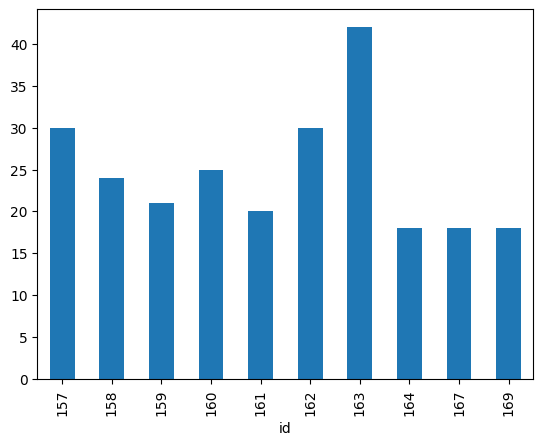

In [94]:
stations.head(10)["number_of_locks"].plot(kind="bar");

### Removing columns from DataFrames

Some of the columns are not useful. We can remove columns from a DataFrame with:
```python
Dataframe.drop([Column Name or list], axis=1)
```
Lets reduce our stations to the usefull columns:

In [95]:
stations = stations.drop(["bounds", "subtitle"], axis=1)   # axis=0 drops rows
stations.head()

,in_service,title,number_of_locks,center.latitude,center.longitude
id,,,,,
157,True,Nylandsveien,30,59.915620,10.762248
158,True,Bentsebrugata,24,59.939228,10.759170
159,True,Hans Nielsen Hauges plass,21,59.939238,10.774279
160,True,SjÃ¸siden vest,25,59.910215,10.751687
161,True,St. Hanshaugen park vest,20,59.926872,10.738456


**Alternative**: Use `.loc` to select a subset of a DataFrame
```python
DataFrame.loc[startrow:endrow,startcolumn:endcolumn]
```

## Adding computed columns

Sometimes it is usefull to add a new column based on calculations. 

**Syntax**:
```python
Dataframe.apply(function, axis=1)  # Results in a Series
``` 

**Example**: Add a column with the distance from the station to Oslo center. 

First we compute a Series with the distance values:®

In [96]:
from numpy import cos, arcsin, sqrt, pi

oslo_center = 59.9127, 10.7461 # oslo center latitude, longitude

def distance_to_oslo_center(row):
    """ Computes the distance of a lat/lon"""

    lat_station = row["center.latitude"]
    lon_station = row["center.longitude"]

    lat_sentrum, lon_sentrum = oslo_center

    degrees = pi / 180  # convert degrees to radians
    a = (
        0.5
        - (cos((lat_sentrum - lat_station) * degrees) / 2)
        + (
            cos(lat_sentrum * degrees)
            * cos(lat_station * degrees)
            * (1 - cos((lon_station - lon_sentrum) * degrees))
            / 2
        )
    )
    return 12742 * arcsin(sqrt(a))  # 2 * R * asin...


distance = stations.apply(distance_to_oslo_center, axis=1)
distance

id
157    0.956887
158    3.038354
159    3.342640
160    0.416360
161    1.632424
         ...   
305    3.193283
306    0.316456
307    3.550350
308    3.444120
309    3.580368
Length: 130, dtype: float64

Then we add that serie to the DataFrame:

In [97]:
stations["distance_to_oslo_center"] = distance
stations 

,in_service,title,number_of_locks,center.latitude,center.longitude,distance_to_oslo_center
id,,,,,,
157,True,Nylandsveien,30,59.915620,10.762248,0.956887
158,True,Bentsebrugata,24,59.939228,10.759170,3.038354
159,True,Hans Nielsen Hauges plass,21,59.939238,10.774279,3.342640
160,True,SjÃ¸siden vest,25,59.910215,10.751687,0.416360
161,True,St. Hanshaugen park vest,20,59.926872,10.738456,1.632424
...,...,...,...,...,...,...
305,True,Georg Morgenstiernes hus,45,59.938998,10.723075,3.193283
306,True,MÃ¸llergata,30,59.915290,10.748453,0.316456
307,True,Bak Niels Treschows hus sÃ¸r,42,59.942525,10.723352,3.550350


### Min, max mean of Series data:

We can use mathematical functions such as `min`, `max` or `mean` to get statistical information about a column:

Minimum number of locks:

In [98]:
stations["number_of_locks"].min()

6

Maximum number of locks:

In [99]:
stations["number_of_locks"].max()

48

Average number of locks:

In [100]:
stations["number_of_locks"].mean()

22.29230769230769

## Plotting maps

It would be nice to plot the stations on a map.

In [101]:
from ipywidgets import HTML
from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles

oslo_map = Map(
    center=oslo_center,
    zoom=13,
)


def add_marker(row):
    center = row["center.latitude"], row["center.longitude"]
    m = Marker(
        location=center,
        title=f"{row.name} {row['title']}",
    )

    oslo_map.add_layer(m)
    m.popup = HTML(f"{m.title}<br/>{row.distance_to_oslo_center:.2f} km to center")


stations.apply(add_marker, axis=1)
oslo_map.save("my_2025_map.html")

# Merging Panda objects

So far our bike statistics stores the bike stations as integers:


In [102]:
trips.head()

,index,Start station,Start time,End station,End time
0,0,291,2016-09-01 04:00:02+00:00,301.0,2016-09-01 04:06:06+00:00
1,1,262,2016-09-01 04:00:07+00:00,292.0,2016-09-01 04:15:43+00:00
2,2,277,2016-09-01 04:00:07+00:00,163.0,2016-09-01 04:03:07+00:00
3,3,174,2016-09-01 04:00:07+00:00,157.0,2016-09-01 04:11:33+00:00
4,4,257,2016-09-01 04:00:13+00:00,257.0,2016-09-01 05:36:16+00:00


Wouldn't it be nice to add the station information? 

We achieve this by merging the information in the `stations` DataFrame into the `trips_sep_oct` DataFrame. The syntax for merging two tables with the most important arguments is:

```python
pd.merge(left, right, how='inner', left_on=None, right_on=None)
```         
The arguments mean the following:
* `left`: A DataFrame object
* `right`: Another DataFrame object
* `left_on`: Columns from the left DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame
* `right_on`: Columns from the right DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame
* `how`: One of 'left', 'right', 'outer', 'inner'. Defaults to inner. See below for more detailed description of each method:


###  A simple demo on merging

In [103]:
purchases = pd.DataFrame({"product": ["apples", "pears"], "purchases": [1, 3]})
purchases

,product,purchases
0,apples,1
1,pears,3


In [104]:
prices = pd.DataFrame({"product": ["apples", "pears"], "price": [5.5, 1.2]})
prices

,product,price
0,apples,5.5
1,pears,1.2


In [105]:
pd.merge(purchases, prices, how="right", left_on="product", right_on="product")

,product,purchases,price
0,apples,1,5.5
1,pears,3,1.2


### Back to the Oslo Bysykkel example

Let's try it out. First, lets check the names of our columns again:

In [106]:
print(trips.dtypes)

index                          int64
Start station                  int64
Start time       datetime64[ns, UTC]
End station                  float64
End time         datetime64[ns, UTC]
dtype: object


In [107]:
print(stations.dtypes)

in_service                    bool
title                       object
number_of_locks              int64
center.latitude            float64
center.longitude           float64
distance_to_oslo_center    float64
dtype: object


We want to merge in the columns `trips["Start station"]` with the index for `stations`. The merge call is therefore:

In [108]:
merged_bike_stats = pd.merge(
    trips, stations, how="left", left_on="Start station", right_index=True
)
merged_bike_stats

,index,Start station,Start time,End station,End time,in_service,title,number_of_locks,center.latitude,center.longitude,distance_to_oslo_center
0,0,291,2016-09-01 04:00:02+00:00,301.0,2016-09-01 04:06:06+00:00,True,St. Hanshaugen park nord,15.0,59.929858,10.743541,1.913205
1,1,262,2016-09-01 04:00:07+00:00,292.0,2016-09-01 04:15:43+00:00,True,Sofienbergparken nord,33.0,59.923159,10.766055,1.609201
2,2,277,2016-09-01 04:00:07+00:00,163.0,2016-09-01 04:03:07+00:00,True,Helga Helgesens plass,25.0,59.912071,10.766201,1.122704
3,3,174,2016-09-01 04:00:07+00:00,157.0,2016-09-01 04:11:33+00:00,True,Frogner Tennisklubb,15.0,59.926205,10.709786,2.520150
4,4,257,2016-09-01 04:00:13+00:00,257.0,2016-09-01 05:36:16+00:00,True,Trondheimsveien,10.0,59.923033,10.771682,1.831154
...,...,...,...,...,...,...,...,...,...,...,...
620402,242753,284,2016-10-31 22:53:30+00:00,164.0,2016-10-31 23:04:13+00:00,True,Majorstuen skole,27.0,59.929829,10.713032,2.650263
620403,242754,218,2016-10-31 22:53:48+00:00,292.0,2016-10-31 23:09:17+00:00,True,Briskeby,15.0,59.920187,10.717955,1.775960
620404,242755,204,2016-10-31 22:54:28+00:00,277.0,2016-10-31 23:01:59+00:00,True,PalÃ©haven,48.0,59.910287,10.750012,0.345761
620405,242756,204,2016-10-31 22:56:57+00:00,201.0,2016-10-31 23:02:16+00:00,True,PalÃ©haven,48.0,59.910287,10.750012,0.345761


Let's check that we still have all the data rows:

In [109]:
print(len(merged_bike_stats))
print(len(trips))

620407
620407


Let us do the same for `End station`. To avoid overlapping column names, we use the `suffixes`:

In [110]:
merged_bike_stats2 = pd.merge(
    merged_bike_stats,
    stations,
    how="left",
    left_on="End station",
    right_index=True,
    suffixes=("_start", "_end"),
)
merged_bike_stats2

,index,Start station,Start time,End station,End time,in_service_start,title_start,number_of_locks_start,center.latitude_start,center.longitude_start,distance_to_oslo_center_start,in_service_end,title_end,number_of_locks_end,center.latitude_end,center.longitude_end,distance_to_oslo_center_end
0,0,291,2016-09-01 04:00:02+00:00,301.0,2016-09-01 04:06:06+00:00,True,St. Hanshaugen park nord,15.0,59.929858,10.743541,1.913205,True,Professor Aschehougs plass,19.0,59.914742,10.741007,0.363529
1,1,262,2016-09-01 04:00:07+00:00,292.0,2016-09-01 04:15:43+00:00,True,Sofienbergparken nord,33.0,59.923159,10.766055,1.609201,True,Tjuvholmen,30.0,59.909494,10.722502,1.362960
2,2,277,2016-09-01 04:00:07+00:00,163.0,2016-09-01 04:03:07+00:00,True,Helga Helgesens plass,25.0,59.912071,10.766201,1.122704,True,Vaterlandsparken,42.0,59.913409,10.757370,0.633157
3,3,174,2016-09-01 04:00:07+00:00,157.0,2016-09-01 04:11:33+00:00,True,Frogner Tennisklubb,15.0,59.926205,10.709786,2.520150,True,Nylandsveien,30.0,59.915620,10.762248,0.956887
4,4,257,2016-09-01 04:00:13+00:00,257.0,2016-09-01 05:36:16+00:00,True,Trondheimsveien,10.0,59.923033,10.771682,1.831154,True,Trondheimsveien,10.0,59.923033,10.771682,1.831154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620402,242753,284,2016-10-31 22:53:30+00:00,164.0,2016-10-31 23:04:13+00:00,True,Majorstuen skole,27.0,59.929829,10.713032,2.650263,True,VÃ¥r Frelsers gravlund sÃ¸r,18.0,59.919530,10.743836,0.769874
620403,242754,218,2016-10-31 22:53:48+00:00,292.0,2016-10-31 23:09:17+00:00,True,Briskeby,15.0,59.920187,10.717955,1.775960,True,Tjuvholmen,30.0,59.909494,10.722502,1.362960
620404,242755,204,2016-10-31 22:54:28+00:00,277.0,2016-10-31 23:01:59+00:00,True,PalÃ©haven,48.0,59.910287,10.750012,0.345761,True,Helga Helgesens plass,25.0,59.912071,10.766201,1.122704
620405,242756,204,2016-10-31 22:56:57+00:00,201.0,2016-10-31 23:02:16+00:00,True,PalÃ©haven,48.0,59.910287,10.750012,0.345761,True,Munkegata trikkestopp,24.0,59.908184,10.767799,1.309760


## What are the busiest stations?

Let's first find the busiest station:

<Axes: xlabel='Start station'>

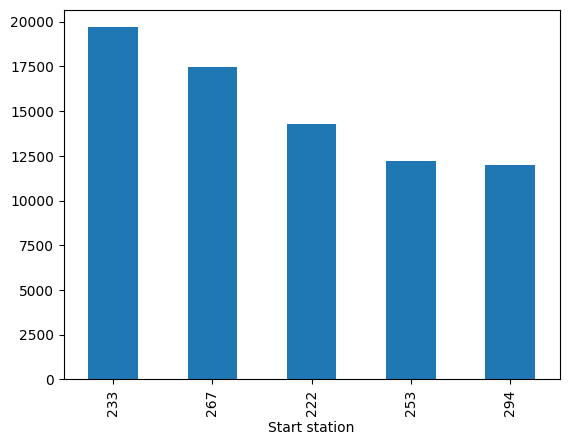

In [111]:
busy_station = merged_bike_stats2['Start station'].value_counts()[:5]
busy_station.plot.bar()

In [112]:
stations.loc[busy_station.index]

,in_service,title,number_of_locks,center.latitude,center.longitude,distance_to_oslo_center
Start station,,,,,,
233,True,Alexander Kiellands Plass,25,59.928050,10.751203,1.730373
267,True,Bislett Stadion,24,59.925480,10.731318,1.642612
222,True,Olaf Ryes plass,35,59.922414,10.758127,1.271247
253,True,Aker Brygge,36,59.911151,10.729977,0.915139
294,True,Torggata,30,59.915936,10.751573,0.471746


### What is the usage pattern of the busiest station?

Filter out all trips starting from the bussiest station

In [113]:
ak_plass_stats = merged_bike_stats[
    merged_bike_stats["Start station"] == busy_station.index[0]
]
ak_plass_stats.head()

,index,Start station,Start time,End station,End time,in_service,title,number_of_locks,center.latitude,center.longitude,distance_to_oslo_center
39,39,233,2016-09-01 04:11:08+00:00,211.0,2016-09-01 04:17:26+00:00,True,Alexander Kiellands Plass,25.0,59.92805,10.751203,1.730373
62,62,233,2016-09-01 04:17:29+00:00,247.0,2016-09-01 04:24:37+00:00,True,Alexander Kiellands Plass,25.0,59.92805,10.751203,1.730373
65,65,233,2016-09-01 04:17:53+00:00,271.0,2016-09-01 04:22:21+00:00,True,Alexander Kiellands Plass,25.0,59.92805,10.751203,1.730373
85,85,233,2016-09-01 04:22:16+00:00,272.0,2016-09-01 04:27:51+00:00,True,Alexander Kiellands Plass,25.0,59.92805,10.751203,1.730373
92,92,233,2016-09-01 04:24:46+00:00,295.0,2016-09-01 04:32:12+00:00,True,Alexander Kiellands Plass,25.0,59.92805,10.751203,1.730373


Plot the results:

In [114]:
resampled_trips = pd.DataFrame({"Counter": 1}, index=ak_plass_stats["Start time"])
resampled_trips.head()

,Counter
Start time,
2016-09-01 04:11:08+00:00,1
2016-09-01 04:17:29+00:00,1
2016-09-01 04:17:53+00:00,1
2016-09-01 04:22:16+00:00,1
2016-09-01 04:24:46+00:00,1


In [116]:
# resample every 30 minutes and sum results
resampled_trips = resampled_trips.resample("30min").sum()
resampled_trips.head()

,Counter
Start time,
2016-09-01 04:00:00+00:00,6
2016-09-01 04:30:00+00:00,9
2016-09-01 05:00:00+00:00,9
2016-09-01 05:30:00+00:00,26
2016-09-01 06:00:00+00:00,7


# Public data APIs

How do we access amazing data? The answer is data APIs.

What is an API?

## What is an API?
API stands for Application Programming Interface and it serves as a data transmitter between two different pieces of software. The term has historically been used to describe any sort of connectivity interface to an application. 

Today, the term API typically takes an additional meaning:
- Modern APIs adhere to certain standards (typically HTTP and REST) 
- They are treated like products
- They often adhere to high security standards

## Types of APIs

### By availability
- **Open and public APIs** are available to everyone. Open APIs will be completely open, in the sense that they will provide access to the complete architecture and all features of their code.  Public APIs, contrarily, will provide restricted access to the codes and datasets.

<img src="figs/open-apis.png" width=400 height=400 />

- **Internal APIs** are used in-house by developers.

- **Partner APIs** are a form of open API where access is granted under certain conditions determined by the publisher.


### By structure
APIs also differ in architecture. The most popular API architectures are:
- **JSON-RPC and XML-RPC**
RPC stands for Remote Procedure Call and is a protocol for data transmission in JSON or XML format. 
- **REST**
REST stands for representational state transfer. It's a software architectural style that provides a set of recommendations for web development. 
- **SOAP** stands for simple object access protocol and is a definition of API protocols and standards.

## Accessing a Public Data API with Python

In order to retrieve data from an API we will combine the ``requests`` library and the ``JSON`` library.

When we want to receive data from the API we first make a *request*.

To do so in python, we need to install the ``requests`` library. 

Open the virtual environment you are using for this course and run

In [ ]:
! pip install requests

If you are using conda you can write ``conda install requests``.

As soon as we have installed it we can import it

In [2]:
import requests

### Example: NASA's APOD API

Let us test out [NASA's open API](https://api.nasa.gov/):

In [3]:
demo_key = "DEMO_KEY"

url = "https://api.nasa.gov/planetary/apod?api_key=" + demo_key

response = requests.get(url)
response.json()

{'copyright': 'Team Ciel Austral',
 'date': '2025-09-18',
 'explanation': "A new visitor from the outer Solar System, comet C/2025 R2 (SWAN) also known as SWAN25B was only discovered late last week, on September 11. That's just day before the comet reached perihelion, its closest approach to the Sun. First spotted by Vladimir Bezugly in images from the SWAN instrument on the sun-staring SOHO spacecraft, the comet was surprisingly bright but understandably difficult to see against the Sun's glare. Still close to the Sun on the sky, the greenish coma and tail of C/2025 R2 (SWAN) are captured in this telescopic snapshot from September 17. Spica, alpha star of the constellation Virgo, shines just beyond the upper left edge of the frame while the comet is about 6.5 light-minutes from planet Earth. Near the western horizon after sunset and slightly easier to see in binoculars from the southern hemisphere, this comet SWAN will pass near Zubenelgenubi, alpha star of Libra, on October 2.  C/202

In [4]:
import json
data = response.json()
from IPython.display import Image
from IPython.core.display import HTML 

print(response.json()['explanation'])
Image(url=data['url'], width=600)

A new visitor from the outer Solar System, comet C/2025 R2 (SWAN) also known as SWAN25B was only discovered late last week, on September 11. That's just day before the comet reached perihelion, its closest approach to the Sun. First spotted by Vladimir Bezugly in images from the SWAN instrument on the sun-staring SOHO spacecraft, the comet was surprisingly bright but understandably difficult to see against the Sun's glare. Still close to the Sun on the sky, the greenish coma and tail of C/2025 R2 (SWAN) are captured in this telescopic snapshot from September 17. Spica, alpha star of the constellation Virgo, shines just beyond the upper left edge of the frame while the comet is about 6.5 light-minutes from planet Earth. Near the western horizon after sunset and slightly easier to see in binoculars from the southern hemisphere, this comet SWAN will pass near Zubenelgenubi, alpha star of Libra, on October 2.  C/2025 R2 (SWAN) is scheduled to make its closest approach to our fair planet ar

## Key concepts:

**Get and post**

The two most common requests we make are ``get`` and ``post``:
- ``Get`` is used for viewing (without changing)
- ``Post`` is used for viewing and possibly changing

**Response codes**

We can check the response code to see if our request was successfull. 

In [5]:
if response.status_code == 200:
    print('Request succeeded!')
else: 
    print(f'Uhoh, we got response code {response.status_code}...')

Request succeeded!


Here are some common status codes: 

(defined by HTTP)

| Code | Status | Description |
| --- | --- | --- |
| 200 | OK | The request was successfully completed   |
| 400 | Bad request| The request was invalid. |
| 401 | Unauthorized | The request did not include an authentication token or the authentication token was expired. |
| 403 | Forbidden | The client did not have permission to access the requested resource. |
| 404 | Not Found | The requested resource was not found. |
| 405 | Not Allowed | The client did not have permission to access the requested resource. |
| 500 | Internal Server Error | The request was not completed due to an internal error on the server side. |
| 503 | Service unavailable | The server was unavailable. |

**Headers**

We can communicate metadata (like who we are) to the API by means of a *header*.

The API also communicates back to us with a header:


In [6]:
response.headers

{'Date': 'Thu, 18 Sep 2025 13:55:12 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Access-Control-Allow-Origin': '*', 'Access-Control-Expose-Headers': 'X-RateLimit-Limit, X-RateLimit-Remaining', 'Age': '0', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Vary': 'Accept-Encoding', 'Via': 'https/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])', 'X-Api-Umbrella-Request-Id': 'cpbkdp568t1cs0tr34lg', 'X-Cache': 'MISS', 'X-Content-Type-Options': 'nosniff', 'X-Ratelimit-Limit': '10', 'X-Ratelimit-Remaining': '9', 'X-Vcap-Request-Id': '967344b0-ed4a-42b2-5712-34c502796444', 'X-Frame-Options': 'DENY'}

**Etiquette** 

When you access a public data API you are expected to follow the playing rules of the API. Therefore you should always start by checking the documentation on the website for the API.

<div>
<img src="figs/rtfm.png" width="250"/>
</div>

In programming this is often referred to as RTFM (read the freaking manual).

[xkcd: RTFM](https://xkcd.com/293/)



In [7]:
requests.get?

Signature: requests.get(url, params=None, **kwargs)
Docstring:
Sends a GET request.

:param url: URL for the new :class:`Request` object.
:param params: (optional) Dictionary, list of tuples or bytes to send
    in the query string for the :class:`Request`.
:param \*\*kwargs: Optional arguments that ``request`` takes.
:return: :class:`Response <Response>` object
:rtype: requests.Response
File:      c:\users\58263\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages\requests\api.py
Type:      function


The actual data typically gets returned in a ``JSON``, ``XML`` or ``CSV file``.


### CSV

A Comma-Separated Values file is a delimited text file that uses a comma to separate values. It typically stores *tabular data*.

<div>
<img src="figs/covid-nums.png" width="300"/>
</div>

*Example*: All tables on statistics from Norway at [SSB](https://www.ssb.no/) can be downloaded as a .csv file.



### JSON
JSON is the most common way of sending data back and forth in APIs. 

A JavaScript Object Notation (JSON) file encodes *data structures* so that they are easy to read for machines and somewhat easy to read for humans.

JSON is a text file or string that follows the JavaScript object syntax. Most programming languages will have the ability to read (parse) and generate JSON files. 

The ``json`` library in Python has two main functions:
- `json.dumps()` Takes in a python object and converts it (dumps it) to a string
- `json.loads()` Takes in a JSON string and converts it (loads it) to a Python object.

which will convert from/to the following formats

| JSON | Python | 
| --- | --- | 
| object | dict | 
| array  | list | 
| string | str  | 
| number (int) |  int | 
| number (real) | float | 
| true | True | 
| false | False | 
| null | None | 


Let's look at what NASA gave us


In [8]:
import json

# Load data using response.json 
response.json?

Signature: response.json(**kwargs)
Docstring:
Returns the json-encoded content of a response, if any.

:param \*\*kwargs: Optional arguments that ``json.loads`` takes.
:raises requests.exceptions.JSONDecodeError: If the response body does not
    contain valid json.
File:      c:\users\58263\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages\requests\models.py
Type:      method

In [9]:
data = response.json()

print('Response.json is a ' + str(type(data)))
print('Printing it yields: ')

response.json()

Response.json is a <class 'dict'>
Printing it yields: 


{'copyright': 'Team Ciel Austral',
 'date': '2025-09-18',
 'explanation': "A new visitor from the outer Solar System, comet C/2025 R2 (SWAN) also known as SWAN25B was only discovered late last week, on September 11. That's just day before the comet reached perihelion, its closest approach to the Sun. First spotted by Vladimir Bezugly in images from the SWAN instrument on the sun-staring SOHO spacecraft, the comet was surprisingly bright but understandably difficult to see against the Sun's glare. Still close to the Sun on the sky, the greenish coma and tail of C/2025 R2 (SWAN) are captured in this telescopic snapshot from September 17. Spica, alpha star of the constellation Virgo, shines just beyond the upper left edge of the frame while the comet is about 6.5 light-minutes from planet Earth. Near the western horizon after sunset and slightly easier to see in binoculars from the southern hemisphere, this comet SWAN will pass near Zubenelgenubi, alpha star of Libra, on October 2.  C/202

## Exercise

1. Make a get request and parse the data from Kanye Rest API:

In [13]:
url = 'https://api.kanye.rest/'

r = requests.get(url)
data = r.json()
data

{'quote': 'People only get jealous when they care.'}

 ## Parameters to an API
 Website links are often very long. It can be difficult to hardcode the entire path of a website if we want to scrape different pages efficiently. 

 We can pass parameters to the get request to easier 

In [14]:
demo_key = "DEMO_KEY"


parameters = {"api_key": demo_key,
              "date": "2024-10-17"}

url = "https://api.nasa.gov/planetary/apod"

response = requests.get(url, params=parameters)
data = response.json()
from IPython.display import Image
from IPython.core.display import HTML 

print(response.json()['explanation'])
Image(url=data['url'], width=600)

NASA's Europa Clipper is now headed toward an ocean world beyond Earth. The large spacecraft is tucked into the payload fairing atop the Falcon Heavy rocket in this photo, taken at Kennedy Space Center the day before the mission's successful October 14 launch. Europa Clipper's interplanetary voyage will first take it to Mars, then back to Earth, and then on to Jupiter on gravity assist trajectories that will allow it to enter orbit around Jupiter in April 2030. Once orbiting Jupiter, the spacecraft will fly past Europa 49 times, exploring a Jovian moon with a global subsurface ocean that may have conditions to support life. Posing in the background next to the floodlit rocket is Comet Tsuchinsan-ATLAS, about a day after the comet's closest approach to Earth. A current darling of evening skies, the naked-eye comet is a visitor from the distant Oort cloud  Growing Gallery: Comet Tsuchinshan-ATLAS in 2024


## Exercise

1. Make a get request from the [NASA Mars Rover API](https://api.nasa.gov/) (https://api.nasa.gov/) to get pictures from Mars. 
2. Specifiy the camera type in parameters
3. Explore the api and create a script that allows you to control the different parameters using variables or command line arguments.

In [15]:
# Get satellite image from Houston
parameters = { 
    'sol': 100,
    'api_key': "DEMO_KEY",
    'page' : 1,
}

url = 'https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos'
r = requests.get( url, parameters)
r_json = r.json()
r_json

{'photos': [{'id': 669,
   'sol': 100,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/00100/opgs/edr/fcam/FRA_406374643EDR_F0050178FHAZ00301M_.JPG',
   'earth_date': '2012-11-16',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active'}},
  {'id': 9487,
   'sol': 100,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/00100/opgs/edr/fcam/FLA_406377515EDR_F0050178FHAZ00302M_.JPG',
   'earth_date': '2012-11-16',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active'}},
  {'id': 9488,
   'sol': 100,
   'camera': {'id': 20,
    'na

In [16]:
Image(url=r_json['photos'][0]["img_src"], width=600)

## https://api.nve.no/doc/magasinstatistikk/
## https://biapi.nve.no/nettleiestatistikk/swagger/index.html

In [25]:
url = "https://biapi.nve.no/magasinstatistikk/api/Magasinstatistikk/HentOffentligData"
response = requests.get(url)
data = response.json()  # Convert JSON response to Python objects

# Print the first 3 items
print(data[:20])


[{'dato_Id': '2011-10-02', 'omrType': 'EL', 'omrnr': 5, 'iso_aar': 2011, 'iso_uke': 39, 'fyllingsgrad': 0.94618076, 'kapasitet_TWh': 17.390587, 'fylling_TWh': 16.45464, 'neste_Publiseringsdato': '0001-01-01T00:00:00', 'fyllingsgrad_forrige_uke': 0.93014157, 'endring_fyllingsgrad': 0.016039193}, {'dato_Id': '2003-02-16', 'omrType': 'EL', 'omrnr': 1, 'iso_aar': 2003, 'iso_uke': 7, 'fyllingsgrad': 0.2476509, 'kapasitet_TWh': 6.0032635, 'fylling_TWh': 1.4867138, 'neste_Publiseringsdato': '0001-01-01T00:00:00', 'fyllingsgrad_forrige_uke': 0.27274328, 'endring_fyllingsgrad': -0.025092378}, {'dato_Id': '2025-07-13', 'omrType': 'EL', 'omrnr': 2, 'iso_aar': 2025, 'iso_uke': 28, 'fyllingsgrad': 0.5967632, 'kapasitet_TWh': 34.04359, 'fylling_TWh': 20.315962, 'neste_Publiseringsdato': '2025-07-23T13:00:00', 'fyllingsgrad_forrige_uke': 0.602646, 'endring_fyllingsgrad': -0.0058827996}, {'dato_Id': '1997-06-08', 'omrType': 'EL', 'omrnr': 1, 'iso_aar': 1997, 'iso_uke': 23, 'fyllingsgrad': 0.42642584, 

In [ ]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

# Get data
url = "https://biapi.nve.no/magasinstatistikk/api/Magasinstatistikk/HentOffentligData"
data = requests.get(url).json()

# Filter for omrnr == 1 and date >= 2020-01-01
filtered = [
    d for d in data
    if d['omrnr'] == 1 and datetime.fromisoformat(d['dato_Id']) >= datetime(2020, 1, 1)
]

# Sort by date
filtered_sorted = sorted(filtered, key=lambda x: x['dato_Id'])

# Extract dates and fyllingsgrad
dates = [datetime.fromisoformat(d['dato_Id']) for d in filtered_sorted]
fyllingsgrad = [d['fyllingsgrad'] for d in filtered_sorted]

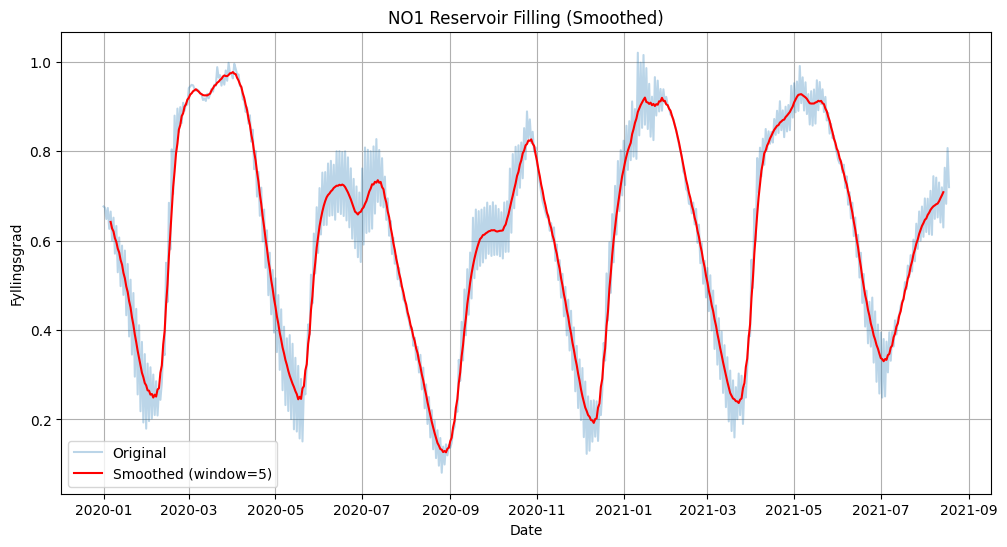

In [31]:
import pandas as pd

# Suppose these are your dates and fyllingsgrad values
dates = pd.date_range(start="2020-01-01", periods=len(fyllingsgrad))
fyllingsgrad_series = pd.Series(fyllingsgrad, index=dates)

# Apply rolling average with a window of 5 (adjust as needed)
smoothed = fyllingsgrad_series.rolling(window=10, center=True).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(fyllingsgrad_series.index, fyllingsgrad_series, alpha=0.3, label="Original")
plt.plot(smoothed.index, smoothed, color='red', label="Smoothed (window=5)")
plt.xlabel("Date")
plt.ylabel("Fyllingsgrad")
plt.title("NO1 Reservoir Filling (Smoothed)")
plt.legend()
plt.grid(True)
plt.show()


